**First Get Latest version of  FAST.AI 


In [3]:
!curl -s https://course.fast.ai/setup/colab | bash

Updating fastai...
Done.


**Connect Google Drive!**

In [4]:
from google.colab import *
drive.mount('/content/gdrive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


Check that it mounted Correctly!

In [5]:
with open('/content/gdrive/My Drive/data/foo.txt', 'w') as f:
  f.write('Hello Google Drive!')
!cat /content/gdrive/My\ Drive/foo.txt

Hello Google Drive!

Get Path! To read csv file

In [6]:
!ls "/content/gdrive/My Drive/data/twitter"

Tweets.csv


GET THE **DATA**

In [0]:
import pandas as pd
import numpy as np


In [0]:
tweets = pd.read_csv('/content/gdrive/My Drive/data/twitter/Tweets.csv')


In [13]:
tweets.head(5)

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20
0,5.703061e+17,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada),NaN,NaN,NaN,NaN,NaN,NaN
1,5.703011e+17,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada),NaN,NaN,NaN,NaN,NaN,NaN
2,5.703011e+17,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada),NaN,NaN,NaN,NaN,NaN,NaN
3,5.703010e+17,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada),NaN,NaN,NaN,NaN,NaN,NaN
4,5.703008e+17,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada),NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
print(tweets.shape)



(14640, 21)


Let's filter the tweets columns to the ones that we might use...


In [0]:
df = tweets.filter(['tweet_id', 'airline_sentiment', 'text'], axis=1)

In [26]:
df.head(5)

,tweet_id,airline_sentiment,text
0,5.703061e+17,neutral,@VirginAmerica What @dhepburn said.
1,5.703011e+17,positive,@VirginAmerica plus you've added commercials t...
2,5.703011e+17,neutral,@VirginAmerica I didn't today... Must mean I n...
3,5.703010e+17,negative,@VirginAmerica it's really aggressive to blast...
4,5.703008e+17,negative,@VirginAmerica and it's a really big bad thing...


In [0]:
train = df.filter(['text','airline_sentiment'], axis=1)

In [136]:
print(train.head(5))

                                                text airline_sentiment
0                @VirginAmerica What @dhepburn said.           neutral
1  @VirginAmerica plus you've added commercials t...          positive
2  @VirginAmerica I didn't today... Must mean I n...           neutral
3  @VirginAmerica it's really aggressive to blast...          negative
4  @VirginAmerica and it's a really big bad thing...          negative


In [106]:
train.iloc[0][0]

'@VirginAmerica What @dhepburn said.'

In [107]:
train['text'][1]

"@VirginAmerica plus you've added commercials to the experience... tacky."

In [108]:
print(train.shape)

(14640, 2)


In [109]:
train.dtypes

text                 object
airline_sentiment    object
dtype: object

In [0]:
train_content = df.filter(['text', 'airline_sentiment'], axis=1)

In [0]:
#The TextClasDataBunch takes the INDEX as Target, so we need to make the Column
#airline_sentiment as index to be able to use the Labels
train_content.set_index('airline_sentiment',inplace=True)

In [163]:
print(train_content.head(2))

                                                                text
airline_sentiment                                                   
neutral                          @VirginAmerica What @dhepburn said.
positive           @VirginAmerica plus you've added commercials t...


Let's find out how the sentiment is stated on the tweets

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns

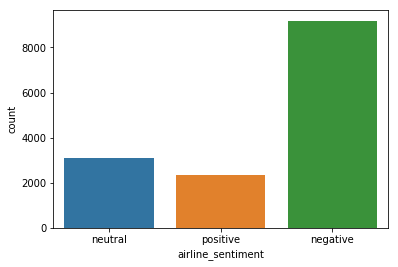

In [111]:
sns.countplot(train.airline_sentiment)
plt.show()

**Prepare Train.csv**

In [0]:
# Write train to csv
train.to_csv('train.csv')
!cp train.csv /content/gdrive/My\ Drive/data/twitter/


In [0]:
# Write train_content to csv to prepare it for the classifier... after the Language Model
train_content.to_csv('train_content.csv')
!cp train_content.csv /content/gdrive/My\ Drive/data/twitter/ 

Lets do the FastAi imports that we will need...

In [0]:
from fastai import *
from fastai.text import *

In [113]:
path = '/content/gdrive/My\ Drive/data/twitter/'
print(path)

/content/gdrive/My\ Drive/data/twitter/


In [114]:
!ls /content/gdrive/My\ Drive/data/twitter/

models	train.csv  Tweets.csv


Create a DataBunch

In [0]:
data_lm = TextLMDataBunch.from_csv('/content/gdrive/My Drive/data/twitter/','train.csv', min_freq=1)

# DataBunch is created...For Language Model

In [120]:
print(data_lm)

TextLMDataBunch;

Train: LabelList (11711 items)
x: LMTextList
xxbos @united # unitedairlines so my feedback is for your benefit , not for you to correct your atrocious customer service ? xxmaj good to know,xxbos @usairways @usairways i used my aadvantage xxmaj number connected to the usairways when i booked tickets for friends . xxmaj will it benefit my account ?,xxbos @united stay more than 24h traveling ans sleeping on the airports floor,xxbos @americanair how is xxup us4623 going to be on time when they are still deplaning at 4:08 ? xxmaj this is xxup bs .,xxbos @americanair you bet make this screw up right ( for once ) . xxmaj things i need in bag for my job and you have " grounded " me today # painandsuffering
y: LMLabelList
,,,,
Path: /content/gdrive/My Drive/data/twitter;

Valid: LabelList (2929 items)
x: LMTextList
xxbos @united xxmaj how does xxmaj united refuse to xxunk a $ 400 lost voucher when their plane did n't take off due to mechanics ? # badcustomerservice,xxbos @usai

In [0]:
data_lm.save('data_lm.pkl')

In [122]:
data_lm.show_batch()

idx,text
0,"for tomorrow by chance ? xxmaj even to xxmaj late xxmaj flightr in the day would be super helpful . xxbos @jetblue we 're home , you guys recovered , now we can laugh about it and the extra day in barbados . xxmaj will you open xxmaj cuba soon ? xxbos @united @adam_karren @zj76 how did you save the $ 200 on checked snowboard ? xxmaj trying to check"
1,"then sends you an email saying "" think about your next flight ... "" # customer # outrage http : / / t.co / kkwiwi97a4 xxbos @united , # deaffriendly ? xxmaj getting there . xxmaj read your review on http : / / t.co / 2brt0athau : http : / / t.co / wznp5q1m0h xxbos @jetblue would have been good to know months ago that you xxmaj cancelled xxmaj"
2,"round trip , my xxup non - xxmaj english speaking friend was stranded xxup twice for 12 + hours each time ! xxmaj most staff members were rude . xxbos @jetblue # 1680 xxmaj super smooth flight and landing . xxmaj nicely done . xxbos @southwestair ha , ha not a make or break for me either way ! xxbos @united besides landing the plane , overall customer service experience"
3,... i clearly purchased this seat with my miles and refuse to downgrade . # ripoff xxbos @virginamerica you know what would be amazingly awesome ? xxup bos - xxup fll xxup please xxrep 7 ! i want to fly with only you . xxbos @jetblue some woman stole my seat on the plane but i was the one that had to sit elsewhere . xxmaj is that standard protocol
4,"xxmaj friday morning using my expired license ? xxbos @united xxmaj kewl . xxmaj will also let them know the overhead bin over my row was "" xxmaj inop "" . i love a good abbreve . xxbos @americanair overall lack of attention or foresight when managing flights . xxbos @jetblue xxmaj hey guys ! xxmaj your xxmaj flight xxmaj booking xxmaj problems system ran my first and middle names"


**We Have to USE the Wikipedia Weights for the ULMFit, we use the fastai supplied WT103_1, from wikipedia trained model**

NOTE: The API for language_model_learner has changed. Check the docs 33 but you will need something like:

learn = language_model_learner(data_lm, arch=AWD_LSTM, drop_mult=0.3)

Also, if you take a look at the source you will see that the AWD_LSTM model loads pre-trained weights from URLs.WT103_1 as default.

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


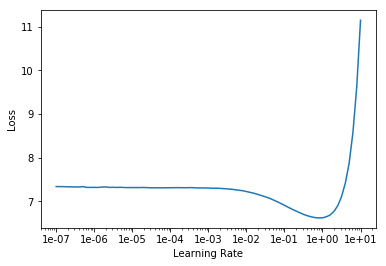

In [117]:
learn = language_model_learner(data_lm, arch=AWD_LSTM, drop_mult=0.3)
learn.lr_find(start_lr=1e-8, end_lr=1e2)
learn.recorder.plot()

In [123]:
# Run one epoch with lower layers 
learn.fit_one_cycle(cyc_len=1, max_lr=1e-2, moms=(0.8, 0.7))

epoch,train_loss,valid_loss,accuracy,time
0,1.189238,5.258035,0.250209,00:18


In [0]:
learn.save('fit_head')

In [0]:
learn.load('fit_head');

In [0]:
# Run for many epochs with all layers unfrozen
learn.unfreeze()


In [130]:
learn.fit_one_cycle(cyc_len=10, max_lr=1e-2, moms=(0.8, 0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.962956,5.285935,0.252846,00:18
1,0.916090,5.354232,0.249860,00:18
2,1.099507,5.360841,0.246568,00:17
3,1.235869,5.379910,0.249358,00:17
4,1.150233,5.426380,0.245578,00:17
5,0.969931,5.463829,0.252023,00:17
6,0.806880,5.442882,0.257115,00:17
7,0.690352,5.410724,0.257840,00:17
8,0.632477,5.377882,0.259863,00:17
9,0.600765,5.370325,0.259431,00:17


In [0]:
learn.save('fine_tuned')

Does the model works? Does it express actually some congruent words?

In [0]:
learn.load('fine_tuned');

In [0]:
TEXT = "I liked this airline because"
N_WORDS = 40
N_SENTENCES = 2

In [134]:
print("\n".join(learn.predict(TEXT, N_WORDS, temperature=0.75) for _ in range(N_SENTENCES)))

I liked this airline because you could n't get me off the first plane so i did n't get my baggage to greenville w me . xxbos Thanks @united , great news that u wo n't refund tickets due to a bad exchange rate
I liked this airline because you guys did n't have everyone to deal with me xxbos @americanair No . Just felt that you could do better in making the emails feel a little less of “ We do n’t care .


In [0]:
#SAVE THE ENCODER
learn.save_encoder('fine_tuned_enc')

# Classifier


In [0]:
# Classifier databunch
data_clas = TextClasDataBunch.from_csv('/content/gdrive/My Drive/data/twitter/','train_content.csv',
            vocab=data_lm.vocab, min_freq=1, bs=32)

In [187]:
data_clas.show_batch()

text,target
xxbos @united i xxup just xxup asked xxup my xxup boyfriend xxup to xxup prom xxup over xxup the xxup loudspeaker xxup on xxup flight 494 xxup he xxup said xxup yes xxrep 4 ! xxup best xxup day xxup ever ! ! ! xxup thank u xxup so xxup much xxrep 6 !,positive
xxbos @united - xxup seriously it 's 2015 ? ! ? ! xxup no wifi on a 5hr flight from xxup cle - xxup sfo # 1589 . xxmaj you 're the xxup only airline w / out wifi ... and pls no ' unwind ' xxup bs .,negative
"xxbos @southwestair xxmaj loved one 's flight xxup atl to xxup ind xxmaj cancelled xxmaj flightled due to "" ice in xxmaj indy "" . xxmaj sitting here in xxmaj indy , it is xxunk dry . xxmaj tomorrow 4 - 6 "" of snow .",negative
"xxbos xxup @usairways xxup are xxup you xxup kidding xxup me ? ? xxmaj bad customer service , folks . xxmaj flew from xxup psp to xxup phx flight 2692 on 2 / 19 . ( cont ) http : / / t.co / kigfkvxxdq",negative
"xxbos xxup by xxup the xxup grace xxup of xxup god , i xxup made xxup it ! “ @usairways : xxup @__rwg _ _ xxmaj we do n't have those powers in here . xxmaj we hope you can make that flight . ”",positive


**Create The Learner**

In [0]:
learn = text_classifier_learner(data_clas, AWD_LSTM, drop_mult=0.5)
learn.load_encoder('fine_tuned_enc')

In [168]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


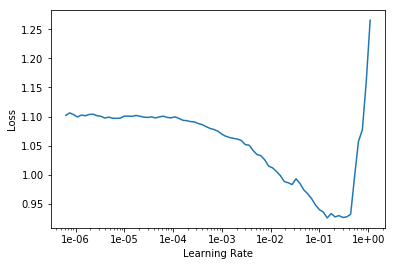

In [169]:
learn.recorder.plot()

In [170]:
learn.fit_one_cycle(1, 2e-2, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.647754,0.521917,0.786958,00:11


In [0]:
learn.save('first')

In [0]:
learn.load('first');

In [173]:
learn.freeze_to(-2)
learn.fit_one_cycle(1, slice(1e-2/(2.6**4),1e-2), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.624734,0.488841,0.803004,00:12


In [0]:
learn.save('second')

In [0]:
learn.load('second');

In [176]:
learn.freeze_to(-3)
learn.fit_one_cycle(1, slice(5e-3/(2.6**4),5e-3), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.527010,0.466485,0.816320,00:19


In [0]:
learn.save('third')

In [0]:
learn.load('third');

In [179]:
learn.unfreeze()
learn.fit_one_cycle(2, slice(1e-3/(2.6**4),1e-3), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.494972,0.463532,0.817344,00:27
1,0.444013,0.454612,0.820075,00:27


# Test Prediction

In [190]:
learn.predict("I really loved that airline, it was awesome!")

(Category neutral, tensor(1), tensor([0.3040, 0.3781, 0.3179]))